# Contents

1. Import Libraries
2. Data Cleaning
3. Elbow Technique
4. Determine Number of Clusters
5. K-means Algorythm
6. Visualizations
7. Descriptive Statistics
8. Insights
9. Usefulness Analysis

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# make a path to project folder
path = r'C:\Users\egrnw\anaconda3\Achievement 6 Project'

In [4]:
# import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'UFC data EXTRA cleaned.csv'), index_col = False)

## 2. Data Cleaning

In [5]:
df.shape

(6012, 148)

In [6]:
df.columns

Index(['Unnamed: 0', 'R_fighter', 'B_fighter', 'Referee', 'date', 'City',
       'State/Province', 'Country', 'Winner', 'title_bout',
       ...
       'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age', 'Winner_encoded'],
      dtype='object', length=148)

In [7]:
df.head(10)

,Unnamed: 0,R_fighter,B_fighter,Referee,date,City,State/Province,Country,Winner,title_bout,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner_encoded
0,0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,3/20/2021,Las Vegas,Nevada,United States of America,Red,False,...,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0,1
1,1,Trevin Giles,Roman Dolidze,Herb Dean,3/20/2021,Las Vegas,Nevada,United States of America,Red,False,...,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0,1
2,2,Tai Tuivasa,Harry Hunsucker,Herb Dean,3/20/2021,Las Vegas,Nevada,United States of America,Red,False,...,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0,1
3,3,Cheyanne Buys,Montserrat Conejo,Mark Smith,3/20/2021,Las Vegas,Nevada,United States of America,Blue,False,...,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0,0
4,4,Marion Reneau,Macy Chiasson,Mark Smith,3/20/2021,Las Vegas,Nevada,United States of America,Blue,False,...,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0,0
5,5,Leonardo Santos,Grant Dawson,Chris Tognoni,3/20/2021,Las Vegas,Nevada,United States of America,Blue,False,...,2,2,0,Orthodox,182.88,190.50,155.0,27.0,41.0,0
6,6,Song Kenan,Max Griffin,Keith Peterson,3/20/2021,Las Vegas,Nevada,United States of America,Blue,False,...,3,0,0,Orthodox,182.88,180.34,170.0,35.0,31.0,0
7,7,Derek Brunson,Kevin Holland,Herb Dean,3/20/2021,Las Vegas,Nevada,United States of America,Red,False,...,7,1,0,Southpaw,185.42,195.58,185.0,28.0,37.0,1
8,8,Montel Jackson,Jesse Strader,Keith Peterson,3/20/2021,Las Vegas,Nevada,United States of America,Red,False,...,0,1,0,Southpaw,177.80,190.50,135.0,29.0,28.0,1
9,9,Bruno Silva,JP Buys,Mark Smith,3/20/2021,Las Vegas,Nevada,United States of America,Red,False,...,0,0,0,NaN,182.88,NaN,185.0,24.0,31.0,1


In [8]:
df.drop(columns=['Unnamed: 0'])

,R_fighter,B_fighter,Referee,date,City,State/Province,Country,Winner,title_bout,weight_class,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner_encoded
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,3/20/2021,Las Vegas,Nevada,United States of America,Red,False,Bantamweight,...,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0,1
1,Trevin Giles,Roman Dolidze,Herb Dean,3/20/2021,Las Vegas,Nevada,United States of America,Red,False,Middleweight,...,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0,1
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,3/20/2021,Las Vegas,Nevada,United States of America,Red,False,Heavyweight,...,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0,1
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,3/20/2021,Las Vegas,Nevada,United States of America,Blue,False,WomenStrawweight,...,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0,0
4,Marion Reneau,Macy Chiasson,Mark Smith,3/20/2021,Las Vegas,Nevada,United States of America,Blue,False,WomenBantamweight,...,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,John McCarthy,3/11/1994,Denver,Colorado,United States of America,Red,False,OpenWeight,...,0,0,0,Southpaw,190.50,NaN,260.0,NaN,NaN,1
6008,Orlando Wiet,Robert Lucarelli,John McCarthy,3/11/1994,Denver,Colorado,United States of America,Red,False,OpenWeight,...,0,0,0,Southpaw,177.80,NaN,170.0,NaN,NaN,1
6009,Johnny Rhodes,David Levicki,John McCarthy,3/11/1994,Denver,Colorado,United States of America,Red,False,OpenWeight,...,0,0,0,Orthodox,182.88,NaN,210.0,NaN,NaN,1
6010,Patrick Smith,Ray Wizard,John McCarthy,3/11/1994,Denver,Colorado,United States of America,Red,False,OpenWeight,...,0,0,0,Orthodox,187.96,NaN,225.0,NaN,30.0,1


### imputing missing values

In [9]:
# find median
B_height_median = df['B_Height_cms'].median()

In [10]:
# impute missing values
df.fillna({'B_Height_cms': B_height_median}, inplace=True)

In [11]:
# find median
R_height_median = df['R_Height_cms'].median()

In [12]:
# impute missing values
df.fillna({'R_Height_cms': R_height_median}, inplace=True)

In [13]:
# find median
B_weight_median = df['B_Weight_lbs'].median()

In [14]:
# impute missing values
df.fillna({'B_Weight_lbs': B_weight_median}, inplace=True)

In [15]:
# find median
R_weight_median = df['R_Weight_lbs'].median()

In [16]:
# impute missing values
df.fillna({'R_Weight_lbs': R_weight_median}, inplace=True)

In [17]:
# find median
B_reach_median = df['B_Reach_cms'].median()

In [18]:
# impute missing values
df.fillna({'B_Reach_cms': B_reach_median}, inplace=True)

In [19]:
# find median
R_reach_median = df['R_Reach_cms'].median()

In [20]:
# impute missing values
df.fillna({'R_Reach_cms': R_reach_median}, inplace=True)

In [41]:
df_clusters = df[['R_Height_cms', 'B_Height_cms', 
                          'R_Reach_cms', 'B_Reach_cms', 
                          'R_Weight_lbs', 'B_Weight_lbs']]

In [42]:
# standardize data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # Standardization
scaled = sc.fit_transform(df_clusters)

res = pd.DataFrame(scaled, columns=df_clusters.columns)
print(res)

      R_Height_cms  B_Height_cms  R_Reach_cms  B_Reach_cms  R_Weight_lbs  \
0        -1.000374     -1.591964    -0.559203    -1.361323     -0.999172   
1         0.441270      1.034995     0.434715     1.033062      0.400772   
2         1.017927      1.034995     0.683195     0.767019      2.612684   
3        -2.153689     -3.051385    -2.298560    -2.957579     -1.559149   
4        -1.288703      0.159342    -1.056162    -0.031109     -0.999172   
...            ...           ...          ...          ...           ...   
6007      1.306256     -0.716311    -0.062244    -0.031109      2.500688   
6008     -0.135388      1.034995    -0.062244    -0.031109     -0.019211   
6009      0.441270      1.910648    -0.062244    -0.031109      1.100744   
6010      1.017927      0.159342    -0.062244    -0.031109      1.520728   
6011     -0.135388      0.451226    -0.062244    -0.031109      1.100744   

      B_Weight_lbs  
0        -0.965766  
1         0.933746  
2         1.910638  
3  

## 3. Elbow Technique

In [43]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [44]:
score = [kmeans[i].fit(df_clusters).score(df_clusters) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-17931545.964970734,
 -7457826.56676127,
 -4127004.19507848,
 -2969674.4540694375,
 -2388940.7650187504,
 -2191036.1517104944,
 -2019679.2603025674,
 -1748959.799803901,
 -1634577.6631250929]

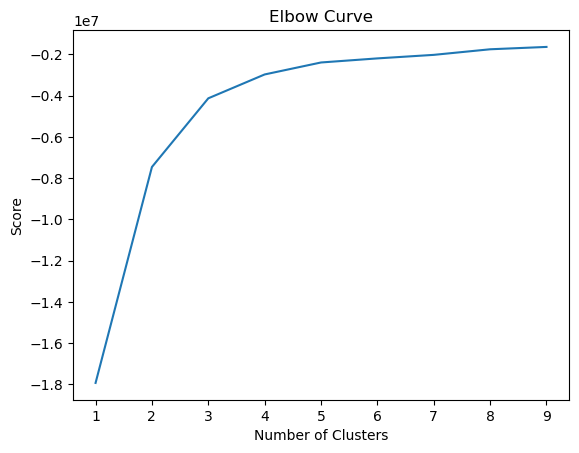

In [45]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

It looks like 3 or 4 would be good to use. The change from 3 to 4 is less dramatic than from 2 to 3. 

I have settled on 3 as the optimal number of clusters. 

# 5. K-means Algorythm

In [46]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [48]:
# Fit the k-means object to the data.

kmeans.fit(df_clusters)

KMeans(n_clusters=3)

In [49]:
df_clusters['clusters'] = kmeans.fit_predict(df_clusters)

C:\Users\egrnw\AppData\Local\Temp\ipykernel_33228\1120628685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clusters['clusters'] = kmeans.fit_predict(df_clusters)


In [50]:
df_clusters.head(10)

,R_Height_cms,B_Height_cms,R_Reach_cms,B_Reach_cms,R_Weight_lbs,B_Weight_lbs,clusters
0,170.18,165.10,177.80,170.18,135.0,135.0,1
1,182.88,187.96,187.96,193.04,185.0,205.0,2
2,187.96,187.96,190.50,190.50,264.0,241.0,0
3,160.02,152.40,160.02,154.94,115.0,115.0,1
4,167.64,180.34,172.72,182.88,135.0,135.0,1
5,182.88,177.80,190.50,182.88,155.0,145.0,1
6,182.88,180.34,180.34,193.04,170.0,170.0,2
7,185.42,190.50,195.58,205.74,185.0,185.0,2
8,177.80,170.18,190.50,177.80,135.0,135.0,1
9,182.88,165.10,182.88,170.18,185.0,125.0,1


In [51]:
df_clusters['clusters'].value_counts()

clusters
1    2783
2    2557
0     672
Name: count, dtype: int64

## 6. Visualizations

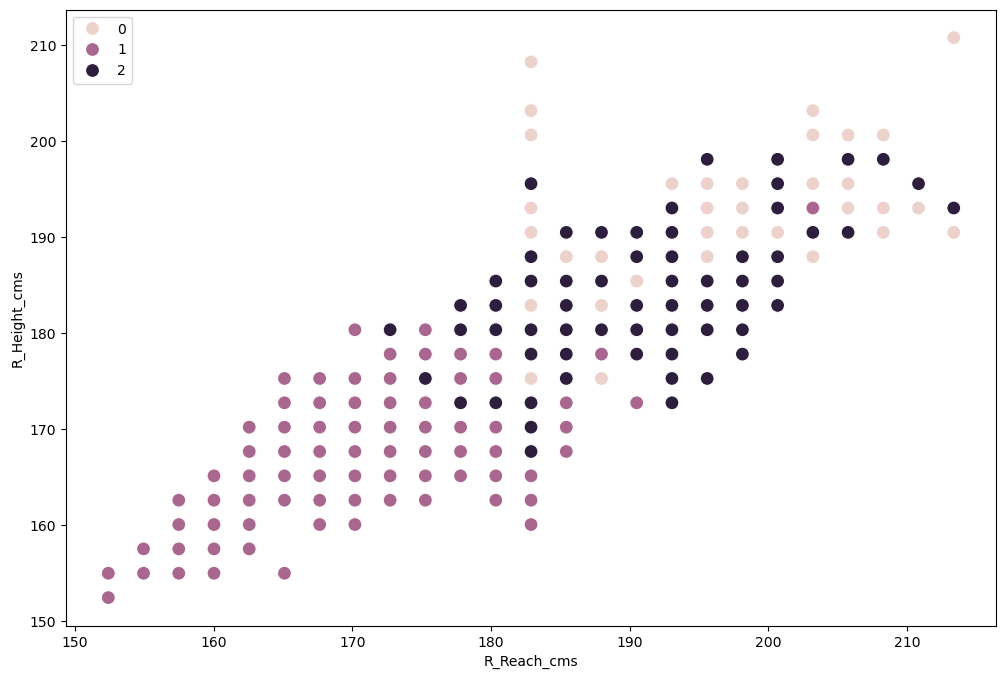

In [53]:
# Plot the clusters for the "R_Reach_cms" and "R_Height_cms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clusters['R_Reach_cms'], y=df_clusters['R_Height_cms'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('R_Reach_cms') # Label x-axis.
plt.ylabel('R_Height_cms') # Label y-axis.
plt.show()

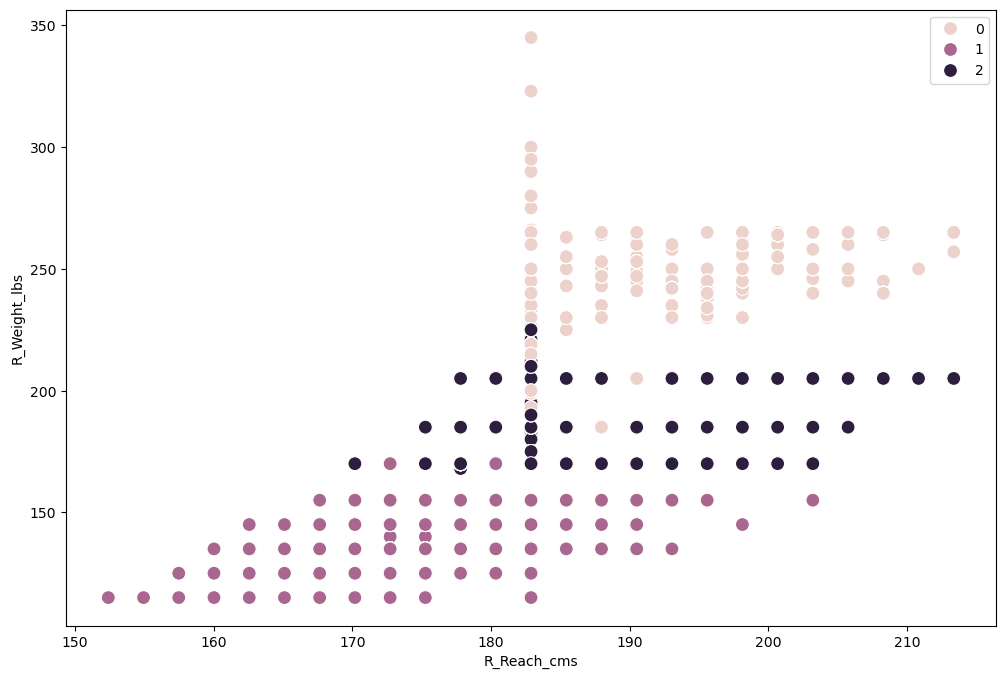

In [54]:
# Plot the clusters for the "R_Reach_cms" and "R_Weight_lbs" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clusters['R_Reach_cms'], y=df_clusters['R_Weight_lbs'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('R_Reach_cms') # Label x-axis.
plt.ylabel('R_Weight_lbs') # Label y-axis.
plt.show()

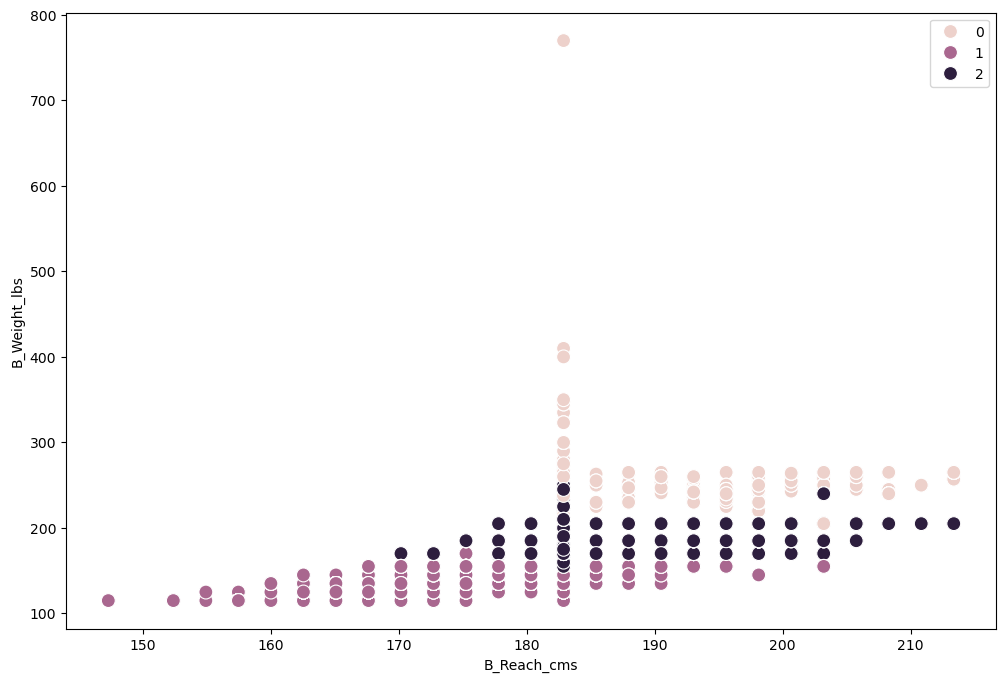

In [55]:
# Plot the clusters for the "B_Reach_cms" and "B_Weight_lbs" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clusters['B_Reach_cms'], y=df_clusters['B_Weight_lbs'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('B_Reach_cms') # Label x-axis.
plt.ylabel('B_Weight_lbs') # Label y-axis.
plt.show()

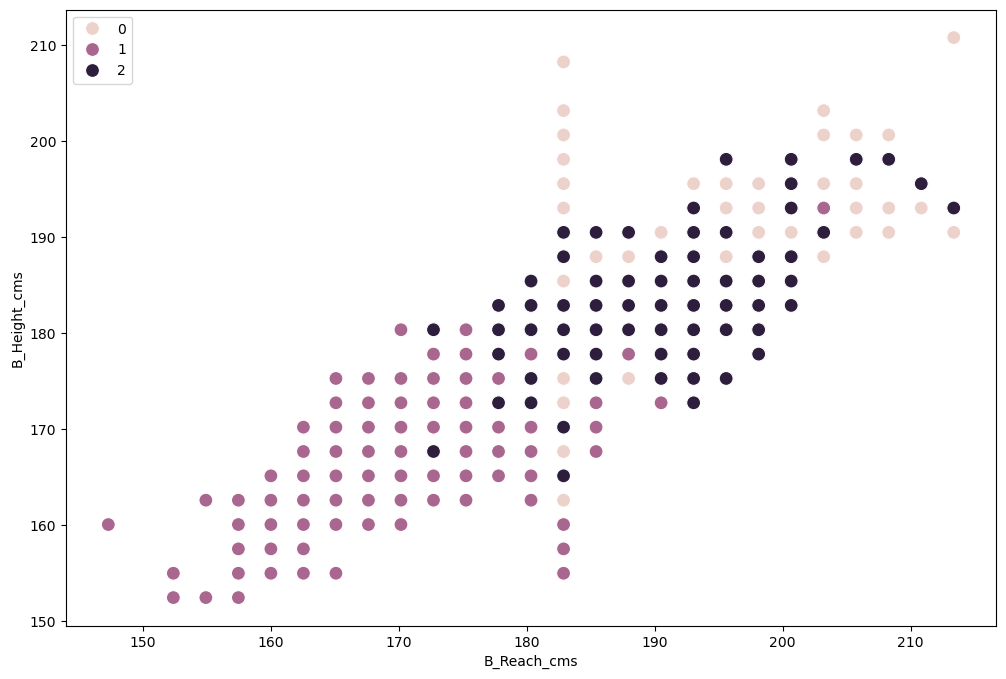

In [56]:
# Plot the clusters for the "B_Reach_cms" and "B_Height_cms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clusters['B_Reach_cms'], y=df_clusters['B_Height_cms'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('B_Reach_cms') # Label x-axis.
plt.ylabel('B_Height_cms') # Label y-axis.
plt.show()

In [57]:
df.loc[df_clusters['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df_clusters['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df_clusters['clusters'] == 0, 'cluster'] = 'pink'

## 7. Descriptive Statistics

In [58]:
df.groupby('cluster').agg({'R_Height_cms':['mean', 'median'], 
                                    'B_Height_cms':['mean', 'median'], 
                                    'R_Reach_cms':['mean', 'median'],
                                    'B_Reach_cms':['mean', 'median'], 
                                    'B_Weight_lbs':['mean', 'median'], 
                                    'R_Weight_lbs':['mean', 'median']})

R_Height_cms         B_Height_cms         R_Reach_cms          \
                    mean  median         mean  median        mean  median   
cluster                                                                     
dark purple   183.521705  182.88   183.279327  182.88  188.743754  187.96   
pink          189.766726  190.50   189.430327  190.50  193.992500  195.58   
purple        172.229889  172.72   172.448933  172.72  176.183636  177.80   

            B_Reach_cms         B_Weight_lbs        R_Weight_lbs         
                   mean  median         mean median         mean median  
cluster                                                                  
dark purple  187.924239  187.96   182.030504  185.0   182.233868  185.0  
pink         191.928750  190.50   245.915179  247.0   245.197917  245.0  
purple       176.702041  177.80   141.890047  145.0   142.084082  145.0

## 8. Insights

Looks like the purple value would be the lightest weight class, dark purple would be medium weight class, and pink is the heavy weight class.

Likewise height and reach follows as the smallest in purple, medium in dark purple, and tallest in pink groupings. 

Reach scales proportionally with height.

## 9. Usefulness Analysis

These results could be useful for showing what physical attributes between height, weight, and reach contribute most to wins

Could also combine with fighting stances to see if certain body types favor a particular stance. 